<a href="https://colab.research.google.com/github/suribe1010/theegg_ai/blob/master/Gr%C3%A1ficos_An%C3%A1lisis_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. LECTURA DE DATOS: BIEN IMPORTÁNDOLOS O DESDE GITHUB**

- CSV
- JSON



In [6]:
class CSV_Reader():
  def ReadFromLoadedFiles(self, Filename):
    # OPTION 1
    # =======================================================================
    # - The user uploads the files 
    # - They must be a CSV  UTF-8 (converted from Excel) --> otherwise, problems!
    import pandas as pd
    from google.colab import files
    uploaded = files.upload()

    # - Reading the files that the user uploaded
    import io
    return pd.read_csv(io.BytesIO(uploaded[Filename]))

  def ReadFromGithub(self, URL):
    # OPTION 2
    # =======================================================================
    # - The file is stored in Github. We take the URL of the raw version of the file.
    # - They must be a CSV  UTF-8 (converted from Excel) --> otherwise, problems!
    import pandas as pd
    return pd.read_csv(URL)

csv_reader = CSV_Reader();
URL = "https://raw.githubusercontent.com/suribe1010/theegg_ai/master/Year%201/tarea_26_CovidAnalysis/NuevasHospitalizacionesProvincias.csv"
data_ingresoshospitalarios = csv_reader.ReadFromGithub(URL)

In [7]:
import numpy as np

class JSON_Reader():
  def ReadFromLoadedFiles(self, Filename):
    # OPTION 1
    # =======================================================================
    # - The user uploads the files 
    # - They must be a JSON file without strange characters. UTF-8 recognizable
    # - Each row must have same columns data(I think!)
    from google.colab import files
    uploaded = files.upload()

    # - Reading the files that the user uploaded
    import io
    return pd.read_json(io.BytesIO(uploaded[Filename]))

  def ReadFromGithub(self, URL):
    # OPTION 2
    # =======================================================================
    # - The file is stored in Github. We take the URL of the raw version of the file.
    # - They must be a JSON file without strange characters. UTF-8 recognizable
    # - Each row must have same columns data(I think!)
    import pandas as pd
    
    return pd.read_json(URL, dtype=object) #dtype coge el valor exacto. Sin él, nos pone multitud de decimales
  
json_reader = JSON_Reader();
URL = 'https://raw.githubusercontent.com/suribe1010/theegg_ai/master/Year%201/tarea_26_CovidAnalysis/Covid_Fallecidos.json'
data_evolucion_diaria_fallecidos = json_reader.ReadFromGithub(URL)
data_evolucion_diaria_fallecidos = np.transpose(data_evolucion_diaria_fallecidos)

URL = 'https://raw.githubusercontent.com/suribe1010/theegg_ai/master/Year%201/tarea_26_CovidAnalysis/Covid_Positivos_MaleFemale_Fallecidos_Letalidad_PorEdad.json'
data_por_edad = json_reader.ReadFromGithub(URL)

**2. ANÁLISIS DE LOS DATOS**

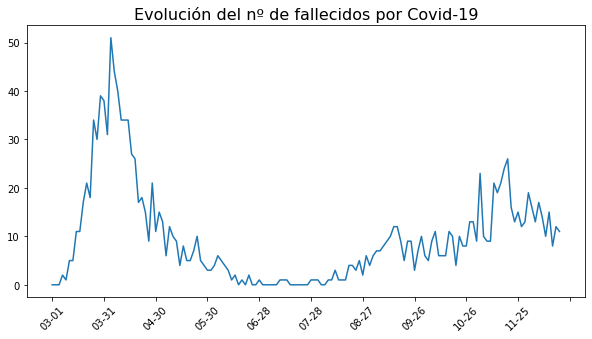

In [8]:
# PLOTEAMOS LA EVOLUCIÓN DEL Nº DE FALLECIDOS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(11))
plt.title('Evolución del nº de fallecidos por Covid-19', fontsize=16)
 
plt.plot(data_evolucion_diaria_fallecidos)
plt.show()

Text(0.5, 1.0, 'Evolución del nº de fallecidos en el Pais Vasco por Covid-19')

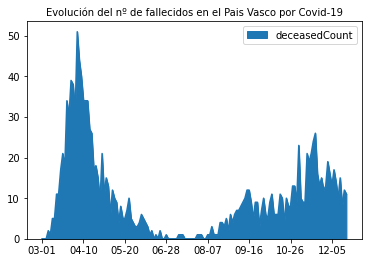

In [9]:
data_evolucion_diaria_fallecidos.plot.area()
plt.title('Evolución del nº de fallecidos en el Pais Vasco por Covid-19', fontsize=10)

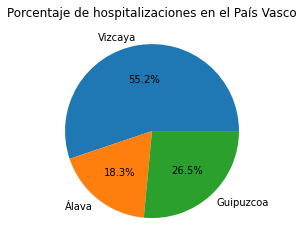

In [10]:
# NUEVOS INGRESOS HOSPITALARIOS POR PROVINCIA

sum = data_ingresoshospitalarios.sum(axis = 0)
values = [sum['Vizcaya'],sum['Álava'],sum['Guipuzcoa']]
my_labels = 'Vizcaya','Álava','Guipuzcoa'
plt.pie(values,labels=my_labels,autopct='%1.1f%%')
plt.title('Porcentaje de hospitalizaciones en el País Vasco')
plt.show()

In [11]:
# ANÁLISIS POR EDAD

data_por_edad


,0 - 9,10-19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80 - 89,90 - 100
population,195423,206343,194050,266369,358785,335098,272250,202172,127540,29987
womenPopulation,95358,99880,95535,132731,177153,170278,142347,111150,79598,22390
menPopulation,100065,106463,98515,133638,181632,164820,129903,91022,47942,7597
positiveCount,6594,11563,13766,14261,18586,18024,11542,7742,7075,3343
positiveWomenCount,3293,5629,7255,7883,9990,9714,5741,3852,4399,2560
positiveMenCount,3301,5933,6507,6372,8594,8306,5792,3890,2675,783
positivesByPopulationRate,3374.22,5603.78,7094.05,5353.85,5180.26,5378.73,4239.49,3829.41,5547.28,11148.2
positivesByWomenPopulationRate,3453.3,5635.76,7594.08,5939.08,5639.19,5704.79,4033.1,3465.59,5526.52,11433.7
positivesByMenPopulationRate,3298.86,5572.83,6605.09,4768.1,4731.55,5039.44,4458.71,4273.69,5579.66,10306.7
positivesByPopulationPercentage,0.0575327,0.100887,0.120109,0.124427,0.162163,0.15726,0.100704,0.0675491,0.0617295,0.0291677


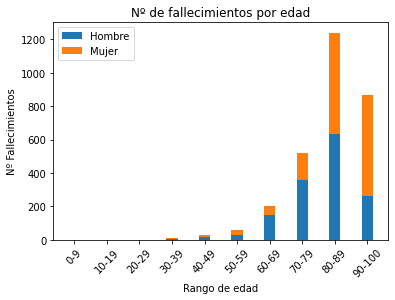

In [12]:
#Nº DE FALLECIMIENTOS POR EDAD

N = 10
menMeans = data_por_edad.iloc[12]
womenMeans = data_por_edad.iloc[11]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.xlabel('Rango de edad')
plt.ylabel('Nº Fallecimientos')
plt.title('Nº de fallecimientos por edad')
plt.xticks(ind, ('0-9', '10-19', '20-29', '30-39', '40-49','50-59', '60-69', '70-79', '80-89', '90-100'))
plt.xticks(rotation=45)
plt.legend((p1[0], p2[0]), ('Hombre', 'Mujer'))

plt.show()

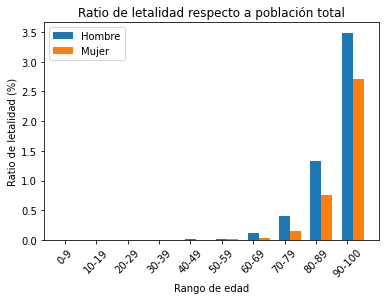

In [15]:
#% DE FALLECIMIENTOS POR EDAD --> respecto a población total

edad=['0-9', '10-19', '20-29', '30-39', '40-49','50-59', '60-69', '70-79', '80-89', '90-100']
Gender=['Hombre','Mujer']
pos = np.arange(len(edad))
bar_width = 0.35

menMeans = data_por_edad.iloc[12] / data_por_edad.iloc[2] * 100
womenMeans = data_por_edad.iloc[11] /  data_por_edad.iloc[1] * 100

plt.bar(pos,menMeans,bar_width)
plt.bar(pos+bar_width,womenMeans,bar_width)
plt.xticks(pos, edad)
plt.xlabel('Rango de edad')
plt.ylabel('Ratio de letalidad (%)')
plt.title('Ratio de letalidad respecto a población total')
plt.legend(Gender,loc=2)
plt.xticks(rotation=45)
plt.show()

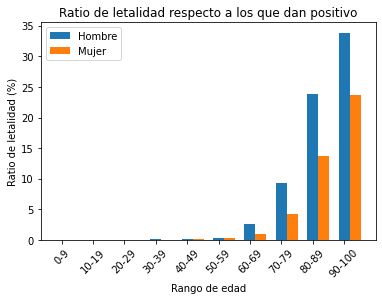

In [17]:
#% DE FALLECIMIENTOS POR EDAD --> respecto a los que se infectan

edad=['0-9', '10-19', '20-29', '30-39', '40-49','50-59', '60-69', '70-79', '80-89', '90-100']
Gender=['Hombre','Mujer']
pos = np.arange(len(edad))
bar_width = 0.35

menMeans = data_por_edad.iloc[12] / data_por_edad.iloc[5] * 100
womenMeans = data_por_edad.iloc[11] /  data_por_edad.iloc[4] * 100

plt.bar(pos,menMeans,bar_width)
plt.bar(pos+bar_width,womenMeans,bar_width)
plt.xticks(pos,edad)
plt.xlabel('Rango de edad')
plt.ylabel('Ratio de letalidad (%)')
plt.title('Ratio de letalidad respecto a los que dan positivo')
plt.legend(Gender,loc=2)
plt.xticks(rotation=45)
plt.show()

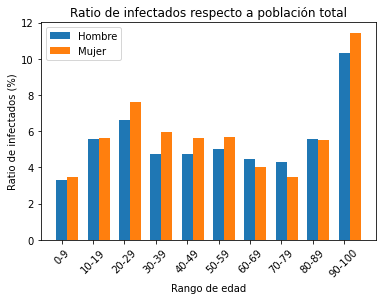

In [19]:
#% DE INFECTADOS POR EDAD --> respecto a población total

edad=['0-9', '10-19', '20-29', '30-39', '40-49','50-59', '60-69', '70-79', '80-89', '90-100']
Gender=['Hombre','Mujer']
pos = np.arange(len(edad))
bar_width = 0.35

menMeans = data_por_edad.iloc[5] / data_por_edad.iloc[2] * 100
womenMeans = data_por_edad.iloc[4] /  data_por_edad.iloc[1] * 100

plt.bar(pos,menMeans,bar_width)
plt.bar(pos+bar_width,womenMeans,bar_width)
plt.xticks(pos, edad)
plt.xlabel('Rango de edad')
plt.ylabel('Ratio de infectados (%)')
plt.title('Ratio de infectados respecto a población total')
plt.legend(Gender,loc=2)
plt.xticks(rotation=45)
plt.show()



In [20]:
sum = data_por_edad.sum(axis = 1)
print("Infectados sobre población total: ", round(sum['positiveCount']/sum['population']*100, 2), "%")
print("Fallecidos sobre población total: ", round(sum['deceasedCount']/sum['population']*100, 2), "%")
print("Fallecidos sobre infectados total: ", round(sum['deceasedCount']/sum['positiveCount']*100, 2), "%")



Infectados sobre población total:  5.14 %
Fallecidos sobre población total:  0.13 %
Fallecidos sobre infectados total:  2.61 %
